# Ejercicios del Módulo 2

estructuras de control y funciones

### Ejercicio curva de declino

Contamos con datos mensuales de producción de 2 pozos, uno de gas y otro de petróleo. La información cubre 36 meses.La idea de este ejercicio es ajustar curvas de declino, curvas de Arps. Dichas curvas tienen la siguiente forma y expresión matemática:
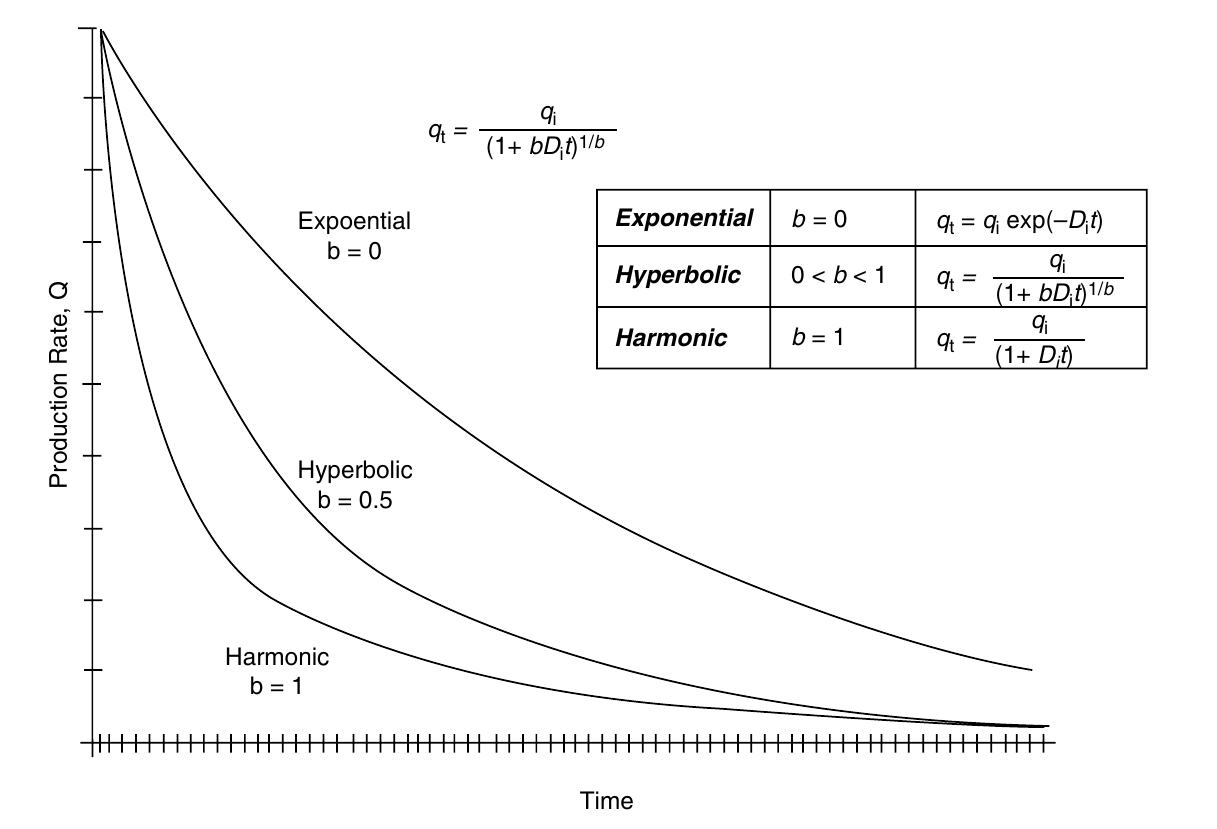

(Imagen extraída de **Tarek AHMED, Reservoir Engineering Handbook** 3rd Edition, 2006 )

In [19]:
#Sentencias de import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parte 1
Crear una función en python que represente las curvas de Arps para b>0. Recordemos que la variable independiente sería el tiempo medido en meses, la dependiente el caudal en m3. 

* Los parámetros de la función son qi,b, di y t.
* Escribir la función para los casos armónico e hiperbólico (b>0).
*  Modificar la función anterior para que calcule la curva de Arps exponencial dependiendo del valor que tome el parámetro b.

In [20]:
#hiperbolico y armonico
def arps_v0(t, qi, b, di):
    return qi / ((1 + b * di * t)**(1 / b)) # no hace falta np.array...



In [21]:
#con curva exponencial para b==0.0
def arps_v0(t, qi, b, di):
    if b==0.0:
        return qi*np.exp(-di*t)
    else:
        return qi / ((1 + b * di * t)**(1 / b))

### Parte 2
Graficar la función para el intervalo de 0 a 24 meses asumiendo estos valores para los parámetros:

* q<sub>i</sub>=100
* b=1
* d<sub>i</sub>=0.1
Para graficar existen varias librerias en python, la más conocida y usada es matplotlib. Veremos más en detalle como graficar en un módulo posterior del curso. Por el momento, podemos usar el código de abajo para graficar, tal como está. Probar con otros valores para los parámetros y ver como cambia la curva.

Text(0, 0.5, 'Prod (m3/dia)')

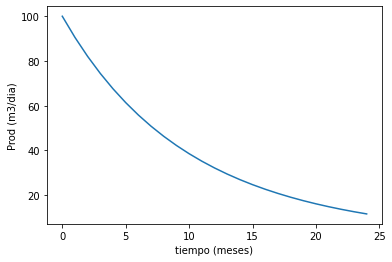

In [22]:
#dejar celda
t=np.arange(25)
qi=100
b=0.1
di=0.1
plt.plot(t,arps_v0(t,qi,b,di), label='base')
plt.xlabel('tiempo (meses)')
plt.ylabel('Prod (m3/dia)')

### Parte 3
Si el límite económico del pozo petrolero de parte 2 son 5 m<sup>3</sup>/día ¿en que mes se alcanzaria ese valor? Si el valor es 1 m<sup>3</sup>/día ¿cuándo se alcanzaría ese valor?
Hint: Se podría usar un ciclo while.​

In [23]:
lim_eco=5

economico=True
max_iter=100
mes=37

while economico:
    if (arps_v0(mes,qi,b,di)<=lim_eco):
        print('horizonte economico alcanzado en {} meses'.format(mes))
        break
    elif mes>=max_iter:
        print('no se alcanzó el horizonte económico antes de {} meses'.format(max_iter))
        break
    else:
        mes=mes+1
    
    

horizonte economico alcanzado en 37 meses


### Parte 4
Curvas de declino con datos reales. Ajuste con datos reales, extraidos de la Secretaria de Energía de Argentina. La celda de abajo contiene datos del Capítulo IV. No cambiar nada, solo correrla.

In [24]:
#### Parte 4
#Datos reales, correr esta celda sin cambiar nada
#idpozo petroleo 135147 : YPF.Nq.LLL-479
#idpozo gas 96632 : APS.NQ.Sa-1048
meses=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
pozo_gas=[1140.0, 1230.0, 1170.08, 936.42, 992.0, 960.0, 992.0, 960.0, 992.0, 899.0, 840.0, 806.0, 750.0, 744.0, 644.88, 562.63, 531.21, 500.0, 516.67, 513.0, 525.75, 549.75, 540.0, 558.0, 501.0, 450.75, 533.58, 532.0, 589.0, 545.46, 554.17, 502.5, 495.75, 474.58, 437.04, 485.25]
pozo_petro=[438.96, 652.23, 486.05, 336.83, 223.2, 489.34, 226.91, 184.33, 172.22, 174.67, 211.88, 223.21, 190.31, 172.06, 90.89, 96.72, 76.09, 121.05, 62.65, 64.55, 73.4, 54.31, 134.48, 81.73, 47.12, 41.63, 47.88, 49.92, 45.55, 48.08, 50.84, 54.35, 77.68, 87.99, 89.51, 90.62]

Graficar los datos usando la función pyplot de matplotlib. En su forma más simple, se puede usar la sintaxis

* import matplotlib.pyplot as plt
* plt.scatter(x,y)
* plt.scatter(x,y,color='r') 
* #color puede ser por ejemplo 'b' para blue y 'r' para red

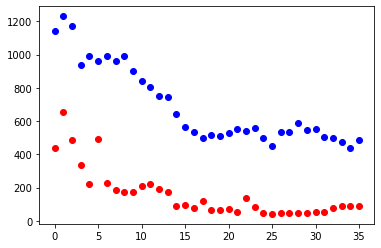

In [25]:
plt.scatter(meses,pozo_gas,color='b')
plt.scatter(meses,pozo_petro,color='r')

Graficar los datos en escala logaritmica. Repetir los pasos anteriores y usar ademas las siguientes instrucciones:
* plt.yscale('log')
* plt.xscale('log')

Agregar además los nombes de los ejes con las siguientes instrucciones:

* plt.xlabel('nombre eje x')
* plt.ylabel('nombre eje y')

En la funcion scatter se puede agregar un nombre que luego se muestra usando la opción legend, con la sintaxis:
* plt.scatter(x,y,color='r',label='data')
* plt.legend()

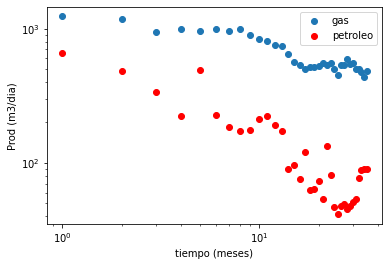

In [26]:
plt.scatter(meses,pozo_gas,label='gas')
plt.scatter(meses,pozo_petro,color='r',label='petroleo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('tiempo (meses)')
plt.ylabel('Prod (m3/dia)')
plt.legend()

### Parte 5
Con los datos cargados en el notebook(parte 4): encontrar los valores de qi, b y di para pozo de gas. Usaremos la función [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) de la librería scipy. Una forma de usar la función es la siguiente:

* from scipy.optimize import curve_fit

* parametros, errores= curve_fit(funcion,X,Y, punto_inicial)

Luego, imprimir los parámetros de la curva de declino. En la sintaxis anterior, *parametros* es una tupla

In [27]:
from scipy.optimize import curve_fit
y=pozo_gas
p0=1200,0.5,0.01
popt, pcov = curve_fit(arps_v0, np.array(meses), np.array(y), p0)


In [28]:
#Parámetros
print(popt)
print('qi: {:.1f}, b: {:.4f}, di: {:.4f}'.format(popt[0],popt[1],popt[2]))

[1.23754988e+03 1.17189069e+00 5.91085336e-02]
qi: 1237.5, b: 1.1719, di: 0.0591


### Parte 6
Graficar la curva Arps estimada con los parametros de decline del ejercicio anterior junto a los datos originales.
Agregar los nombres de los ejes y la leyenda. Agregar un titulo con la sintaxis: ​

* plt.scatter(x,y,color='r',label='data')
* plt.plot(x_arps,y_arps, label='curva ajustada')

Agregar los nombres de los ejes y la leyenda. Agregar un titulo con la sintaxis: 
* plt.title('titulo')


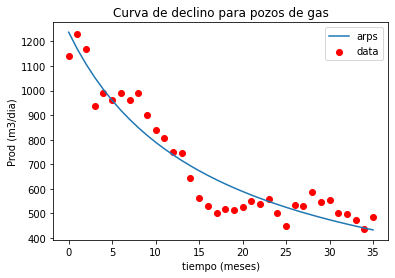

In [29]:
t=np.arange(36)
qi=popt[0]
b=popt[1]
di=popt[2]
t.shape

plt.plot(t,arps_v0(t,qi,b,di), label='arps')
plt.scatter(t,y,color='r',label='data')
plt.xlabel('tiempo (meses)')
plt.ylabel('Prod (m3/dia)')
plt.legend()
plt.title('Curva de declino para pozos de gas')
plt.show()

### Parte 7
Repetir lo hecho para el pozo de gas (partes 5 y 6) con los datos correspondientes al pozo de petróleo
1. Ajustar la curva con curve_fit
2. Graficar los datos del pozo y la curva ajustada con matplotlib



In [30]:
#Ajuste
y=pozo_petro
p0=400,1.0,0.001
popt, pcov = curve_fit(arps_v0, np.array(meses), np.array(y), p0)

/tmp/ipykernel_30100/242531585.py:6: RuntimeWarning: invalid value encountered in power
  return qi / ((1 + b * di * t)**(1 / b))


In [31]:
#Parámetros
print(popt)
print('qi: {:.1f}, b: {:.4f}, di: {:.4f}'.format(popt[0],popt[1],popt[2]))

[5.61114837e+02 4.17631434e-01 1.40453067e-01]
qi: 561.1, b: 0.4176, di: 0.1405


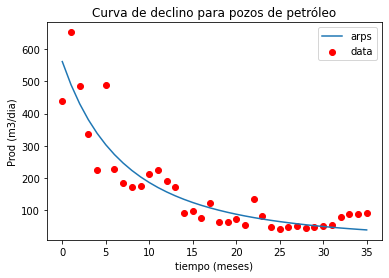

In [32]:
t=np.arange(36)
qi=popt[0]
b=popt[1]
di=popt[2]
t.shape

plt.plot(t,arps_v0(t,qi,b,di), label='arps')
plt.scatter(t,y,color='r',label='data')
plt.xlabel('tiempo (meses)')
plt.ylabel('Prod (m3/dia)')
plt.legend()
plt.title('Curva de declino para pozos de petróleo')
plt.show()

### Parte 8
Si el límite económico del **pozo petrolero** es de 5 m<sup>3</sup>/día ¿en que mes se alcanzaria ese valor? Si el valor es 1  m<sup>3</sup>/día ¿cuándo se alcanzaría ese valor? Reusar el código de la parte 3 y construir una funcion llamada **limite_economico** que devuelva en que mes se alcanza ese valor. La función debe tomar los siguientes parametros: arps (la funcion), qi,b,di y el limite economico lim_eco.

In [33]:
def limite_economico(arps,qi,b,di,lim_eco):
    economico=True
    max_iter=600
    mes=0
    while economico:
        if (arps(mes,qi,b,di)<=lim_eco):
            print('horizonte economico alcanzado en {} meses'.format(mes))
            break
        elif mes>=max_iter:
            print('no se alcanzó el horizonte económico antes de {} meses'.format(max_iter))
            
            break
        else:
            mes=mes+1
    return mes

    

In [34]:
limite_economico(arps_v0,qi,b,di,1)

horizonte economico alcanzado en 223 meses


223

In [35]:
223/12


18.583333333333332